In [27]:
from mads_datasets import DatasetFactoryProvider, DatasetType
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy.stats as stats
from typing import Tuple

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

penguinsdataset = DatasetFactoryProvider.create_factory(
    DatasetType.IRIS
)
penguinsdataset.download_data()

df = pd.read_csv(penguinsdataset.filepath,
                 header=None,
                 names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
# ).dropna()

select = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
# subset = df[select].dropna()
df.head()
df.shape

2023-10-04 22:46:45.342 | INFO     | mads_datasets.base:download_data:121 - Folder already exists at /Users/ghaith/.cache/mads_datasets/iris
2023-10-04 22:46:45.345 | INFO     | mads_datasets.base:download_data:124 - File already exists at /Users/ghaith/.cache/mads_datasets/iris/iris.csv


(151, 5)

In [35]:
floats = df.select_dtypes(include="float64")
correlation_matrix = floats.corr() 

AttributeError: module 'pandas' has no attribute 'select_dtypes'

<Axes: >

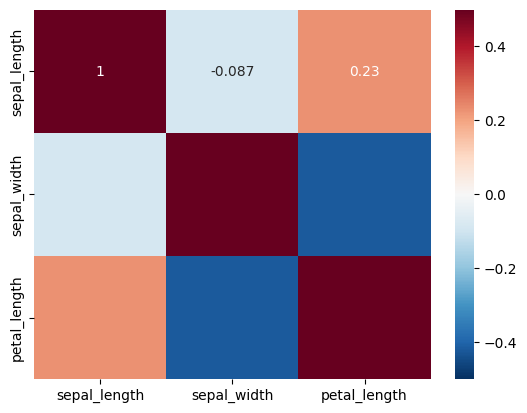

In [20]:
sns.heatmap(correlation_matrix, vmin=-0.5, vmax=0.5, annot=True, cmap="RdBu_r")

In [ ]:
import matplotlib.pyplot as plt

datafile = Path("data/raw/correlation.csv")
df = pd.read_csv(datafile)
df.shape

In [ ]:
correlation_matrix = df.corr()
sns.scatterplot(x=correlation_matrix.index, y=correlation_matrix.target)
plt.xticks([])

In [ ]:
X = df.drop(columns=["target"]).values
y = df["target"].values

X.shape, y.shape

In [ ]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(penalty="elasticnet", random_state=42)
regressor.fit(X, y)
coef = regressor.coef_
plt.plot(coef.T, 'o')

In [36]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV


l1_ratio = [.1, .15, .3, .6, .75, .9, .95, .99, 1]
alphaList = [0.001, 0.01, 0.1, 1, 10, 100]

regressor = SGDRegressor(penalty="elasticnet", random_state=42)
param_grid = dict(alpha=alphaList, l1_ratio=l1_ratio)

grid = GridSearchCV(
    regressor,
    param_grid=param_grid,
    cv=5,
)


grid.fit(X, y)
best_model = grid.best_estimator_
coef = best_model.coef_
plt.plot(coef.T, 'o')

ModuleNotFoundError: No module named 'sklearn'